In [ ]:
import pandas as pd
car=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
car.head()




,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
car['km_driven']>50000

0        True
1       False
2        True
3       False
4        True
        ...  
4335     True
4336     True
4337     True
4338     True
4339    False
Name: km_driven, Length: 4340, dtype: bool

In [ ]:
car[car['km_driven']>50000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4334,Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV,2012,600000,170000,Diesel,Individual,Manual,First Owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner


In [ ]:
car[car['km_driven']>500000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner
4184,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner


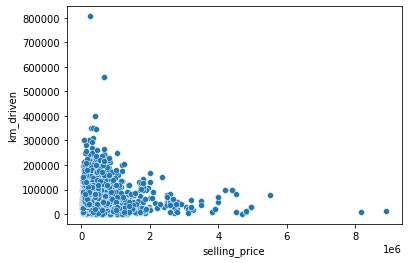

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
sns.scatterplot(x='selling_price',y='km_driven',data=car)
plt.show()

In [28]:
y=car[['selling_price']]
x=car[['year','km_driven','fuel','seller_type','transmission','owner']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) 
x_train.head()

,year,km_driven,fuel,seller_type,transmission,owner
2445,2009,30000,4,1,1,2
2327,2016,60000,4,1,1,0
724,2014,59110,1,0,1,0
668,2011,90000,4,1,1,0
2901,2012,50000,1,1,1,0


In [31]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test)

161333499416.6976

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
car.name = le.fit_transform(car.name)
car.fuel = le.fit_transform(car.fuel)
car.seller_type = le.fit_transform(car.seller_type)
car.transmission = le.fit_transform(car.transmission)
car.owner = le.fit_transform(car.owner)
